In [1]:
import razor
import razor.flow as rf
from razor import api
from razor.flow.spark import SparkBlock, SparkExecutor

In [2]:
from pyspark import SparkContext
#sc = SparkContext("local", "First App")


from pyspark.sql import SparkSession
from pyspark import SparkConf

session = SparkSession.builder.appName("SAN")
session.getOrCreate()





In [3]:
SparkContext._jvm is None

False

In [4]:
import sys
sys.executable

'/usr/bin/python3'

In [5]:
import os
from datetime import datetime, timedelta
from pyspark.sql import SparkSession, functions
from pyspark.sql.dataframe import DataFrame
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
from pyspark.sql.types import IntegerType, DateType, ArrayType, StringType, FloatType, TimestampType


In [6]:
from project.blocks.ayan_spark_blocks_clone import MercStatic
from project.blocks.ayan_spark_blocks_clone import ReadCsvProjectSpace
from project.blocks.ayan_spark_blocks_clone import TranCityTS
from project.blocks.ayan_spark_blocks_clone import TranTypeTS
from project.blocks.ayan_spark_blocks_clone import NonSparkPath
from project.blocks.ayan_spark_blocks_clone import CustStatic
from project.blocks.ayan_spark_blocks_clone import ProdTypeTS
from project.blocks.ayan_spark_blocks_clone import CustMercTS
from project.blocks.ayan_spark_blocks_clone import DropDuplicates

In [7]:
# import importlib
# x= importlib.import_module('razor.project.blocks.ayan_spark_blocks_clone' , '/home/aios/published-packages/')
# print(x)

In [8]:
# CustMercTS = x.__dict__['CustMercTS']
# ReadCsvProjectSpace = x.__dict__['ReadCsvProjectSpace']
# NonSparkPath = x.__dict__['NonSparkPath']

In [9]:
def project_space_path(path):
    ps = api.datasources('Project Space')
    return os.path.join(ps.abspath(), path)


In [10]:
nsp = NonSparkPath(ip_path='customer_data.csv')

In [11]:
rcp = ReadCsvProjectSpace(filename = nsp.op_path, config={}, source="")
rcp.executor = SparkExecutor

In [12]:
cm_ts = CustMercTS(ip_data = rcp.data, config={}, source="")
cm_ts.executor = SparkExecutor

In [13]:
pipe = rf.Pipeline('temp', targets = [cm_ts])

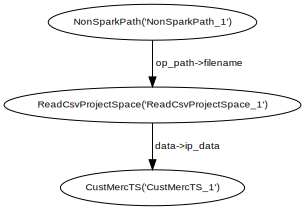

In [14]:
pipe

In [15]:
import sys

In [16]:
# def init_blocks():
#     try:
#         sys.path.append('/home/aios/published-packages/')
#         import project
#         import org
#         import marketplace
#         sys.modules['razor.org'] = org
#         sys.modules['razor.marketplace'] = marketplace
#         sys.modules['razor.project'] = project
#     except Exception as e:
#         pass
# #         std_logger.exception(str(e))
# #         std_logger.error("Couldn't setup block space!")

In [17]:
#init_blocks()

In [18]:
import os
#os.environ
os.environ["PYTHON_PATH"] = "/usr/local/bin/python:/home/aios/published-packages/"

In [19]:
sys.path

['/home/aios/work-dir/ayan',
 '/tmp/spark-7a48dcf9-5942-4af7-9868-d96a920bba45/userFiles-e205bf93-b36b-4f51-a978-27127acb1b43',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '',
 '/home/aios/.local/lib/python3.7/site-packages',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/home/aios/.ipython',
 '/home/aios/published-packages/']

In [20]:
sys.modules['razor.project']

<module 'project' (namespace)>

In [21]:
!which python

/usr/local/bin/python


In [22]:
pipe.execute()

log path: /tmp/tmptk2qg6l1/temp


ERROR:razor.flow.async_pipeline:Block: 'CustMercTS_1': Unhandled Exception: PythonException('\n  An exception was thrown from Python worker in the executor. The below is the Python worker stacktrace.\nTraceback (most recent call last):\n  File "/opt/spark/python/lib/pyspark.zip/pyspark/worker.py", line 589, in main\n    func, profiler, deserializer, serializer = read_udfs(pickleSer, infile, eval_type)\n  File "/opt/spark/python/lib/pyspark.zip/pyspark/worker.py", line 447, in read_udfs\n    udfs.append(read_single_udf(pickleSer, infile, eval_type, runner_conf, udf_index=i))\n  File "/opt/spark/python/lib/pyspark.zip/pyspark/worker.py", line 254, in read_single_udf\n    f, return_type = read_command(pickleSer, infile)\n  File "/opt/spark/python/lib/pyspark.zip/pyspark/worker.py", line 74, in read_command\n    command = serializer._read_with_length(file)\n  File "/opt/spark/python/lib/pyspark.zip/pyspark/serializers.py", line 172, in _read_with_length\n    return self.loads(obj)\n  File 

PythonException: 
  An exception was thrown from Python worker in the executor. The below is the Python worker stacktrace.
Traceback (most recent call last):
  File "/opt/spark/python/lib/pyspark.zip/pyspark/worker.py", line 589, in main
    func, profiler, deserializer, serializer = read_udfs(pickleSer, infile, eval_type)
  File "/opt/spark/python/lib/pyspark.zip/pyspark/worker.py", line 447, in read_udfs
    udfs.append(read_single_udf(pickleSer, infile, eval_type, runner_conf, udf_index=i))
  File "/opt/spark/python/lib/pyspark.zip/pyspark/worker.py", line 254, in read_single_udf
    f, return_type = read_command(pickleSer, infile)
  File "/opt/spark/python/lib/pyspark.zip/pyspark/worker.py", line 74, in read_command
    command = serializer._read_with_length(file)
  File "/opt/spark/python/lib/pyspark.zip/pyspark/serializers.py", line 172, in _read_with_length
    return self.loads(obj)
  File "/opt/spark/python/lib/pyspark.zip/pyspark/serializers.py", line 458, in loads
    return pickle.loads(obj, encoding=encoding)
ModuleNotFoundError: No module named 'project'


In [ ]:
from raz

In [ ]:
pip show pyspark